# Auto ML Classifier Selection:

In [ ]:
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/weather.csv',error_bad_lines=False, index_col=False)

The error_bad_lines argument has been deprecated and will be removed in a future version.


Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
!pip install AutoML

     |████████████████████████████████| 71 kB 64 kB/s 
     |████████████████████████████████| 10.4 MB 12.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 150 kB 36.5 MB/s 
     |████████████████████████████████| 2.9 MB 33.8 MB/s 
     |████████████████████████████████| 627 kB 38.6 MB/s 
     |████████████████████████████████| 81 kB 5.7 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 219 kB 52.0 MB/s 
     |████████████████████████████████| 162 kB 56.5 MB/s 
     |████████████████████████████████| 162 kB 38.6 MB/s 
     |████████████████████████████████| 162 kB 30.8 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
     |████████████████████████████████| 112 kB 52.0 MB/s 
     |████████████████████████████████| 108 kB 57.5 MB/s 
     |████████████████████████████████| 98 kB 6.1 MB/s 
     |██████████████████

In [ ]:
pip install mljar-supervised

     |████████████████████████████████| 111 kB 5.1 MB/s 
     |████████████████████████████████| 3.4 MB 40.0 MB/s 
     |████████████████████████████████| 11.3 MB 31.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 173.6 MB 5.8 kB/s 
     |████████████████████████████████| 2.0 MB 28.3 MB/s 
     |████████████████████████████████| 76.1 MB 48 kB/s 
     |████████████████████████████████| 61 kB 790 bytes/s 
     |████████████████████████████████| 319 kB 37.8 MB/s 
     |████████████████████████████████| 366 kB 35.1 MB/s 
     |████████████████████████████████| 82 kB 295 kB/s 
     |████████████████████████████████| 308 kB 38.3 MB/s 
     |████████████████████████████████| 25.3 MB 35.3 MB/s 
     |████████████████████████████████| 81 kB 5.8 MB/s 
     |████████████████████████████████| 210 kB 51.4 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |██████████████

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
df=df.drop('Unnamed: 58',axis=1)
df=df.drop('GAMEHOST',axis=1)


In [ ]:
pd.to_datetime(df['TIMESTAMP'], unit='ms')

0         1970-01-20 00:12:41.520
1         1970-01-20 00:12:41.520
2         1970-01-20 00:12:41.520
3         1970-01-20 00:12:41.520
4         1970-01-20 00:12:41.520
                    ...          
3572323   1970-01-20 00:11:28.491
3572324   1970-01-20 00:11:28.491
3572325   1970-01-20 00:11:28.491
3572326   1970-01-20 00:11:28.491
3572327   1970-01-20 00:11:28.491
Name: TIMESTAMP, Length: 3572328, dtype: datetime64[ns]

In [ ]:
# Assigning X and Y 
X=df.iloc[:,df.columns!='M_WEATHER']
y=df.iloc[:,df.columns=='M_WEATHER']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'LightGBM']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_DecisionTree logloss 0.1445 trained in 578.72 seconds
Skip default_algorithms because of the time limit.
* Step ensemble will try to check up to 1 model
AutoML fit time: 778.52 seconds
AutoML best model: 1_DecisionTree


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest', 'LightGBM'],
       total_time_limit=300)

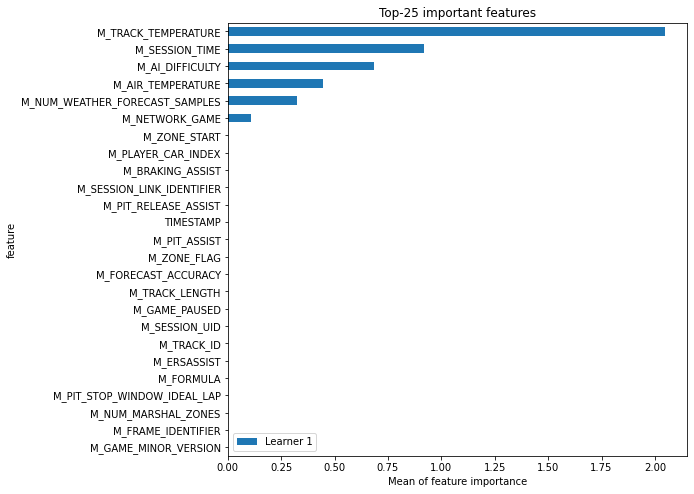

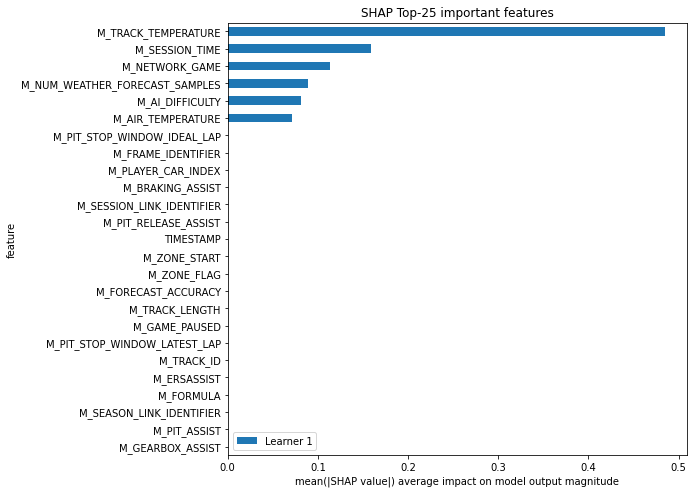

In [ ]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest","LightGBM"],total_time_limit=5*60)
automl.fit(X_train, y_train)

In [ ]:
y_predicted = automl.predict(X_test)

In [ ]:
y_predicted

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    533589
           1       1.00      0.80      0.89    152304
           2       1.00      0.86      0.93     20058
           5       0.38      1.00      0.55      8515

    accuracy                           0.94    714466
   macro avg       0.83      0.91      0.84    714466
weighted avg       0.96      0.94      0.95    714466

